<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/DS_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction

## 1.1 Background
Diabetes is a pressing health issue with significant implications for individuals and healthcare systems worldwide. Predicting diabetes is of paramount importance as it enables early intervention and preventive measures. This capstone project provides an overview of the diabetes problem and its broader health implications. It highlights the critical importance of developing accurate predictive models for diabetes.

## 1.2 Project Objectives
The primary objectives of this comprehensive capstone project are to create robust predictive models for diabetes and to gain insights into the key factors influencing diabetes risk. These models will be instrumental in improving patient care and guiding healthcare practitioners in identifying individuals at risk of diabetes. The project aims to contribute to the broader field of healthcare analytics and predictive modeling.

## 1.3 Dataset Overview
This project utilizes the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) dataset, a valuable resource containing a wide range of patient attributes and outcomes related to diabetes. The dataset's relevance to the project will be discussed, highlighting the specific features and variables used for predictive modeling.



# # Section 2: Data Preprocessing


## 2.1 Data Cleaning
In this subsection, we'll handle missing values in 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' and 'BMI' by filling them with the median value of their respective columns.

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace 'filename.csv' with the actual file path)
data = pd.read_csv('/content/health care diabetes.csv')



# chek that missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There is no missing values in our  dataset

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#   #Replace missing values with the median of their respective columns
# columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# for column in columns_with_missing_values:
#     median_value = data[column].median()
#     data[column].fillna(median_value, inplace=True)
# # Verify that missing values have been filled
# missing_values_count = data.isnull().sum()
# print(missing_values_count)

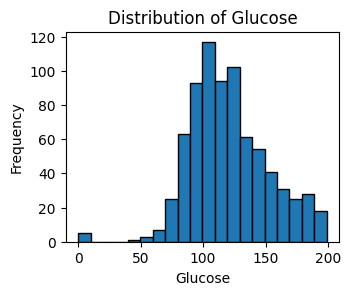

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for key variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(data['Glucose'], bins=20, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')

# Repeat the above code for other variables as needed (e.g., 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')

# Identify and handle outliers (replace 'variable' with the respective variable name)
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]


In [ ]:

data = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]


## 2.2 Data Exploration

For visual exploration, we'll create histograms for key variables, such as 'Glucose.' We'll also identify and handle outliers.

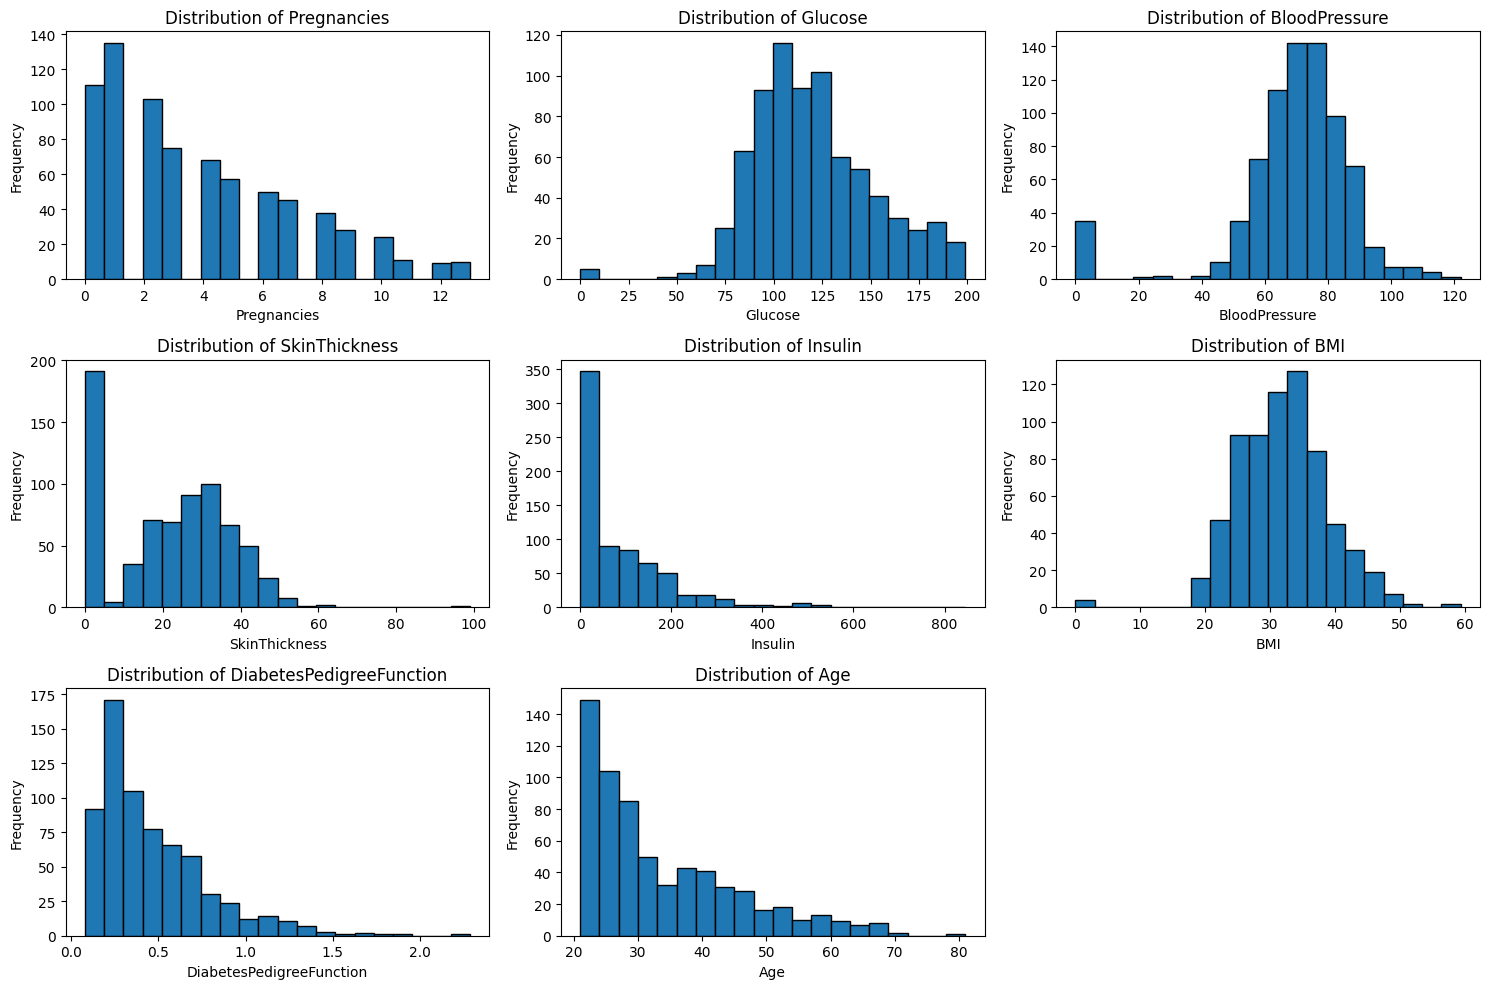

In [ ]:

# List of variables to process
variables_to_process = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create histograms for key variables and handle outliers
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_to_process, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[variable], bins=20, edgecolor='k')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')

    # Identify and handle outliers for each variable
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

plt.tight_layout()
plt.show()


## 2.3 Data Transformation

we can perform data transformations, such as scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale all numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])


## 2.4 Data Visualization
For a more comprehensive understanding of the dataset, we'll create visualizations like pair plots for pairwise relationships and a heatmap for correlation analysis using Seaborn.

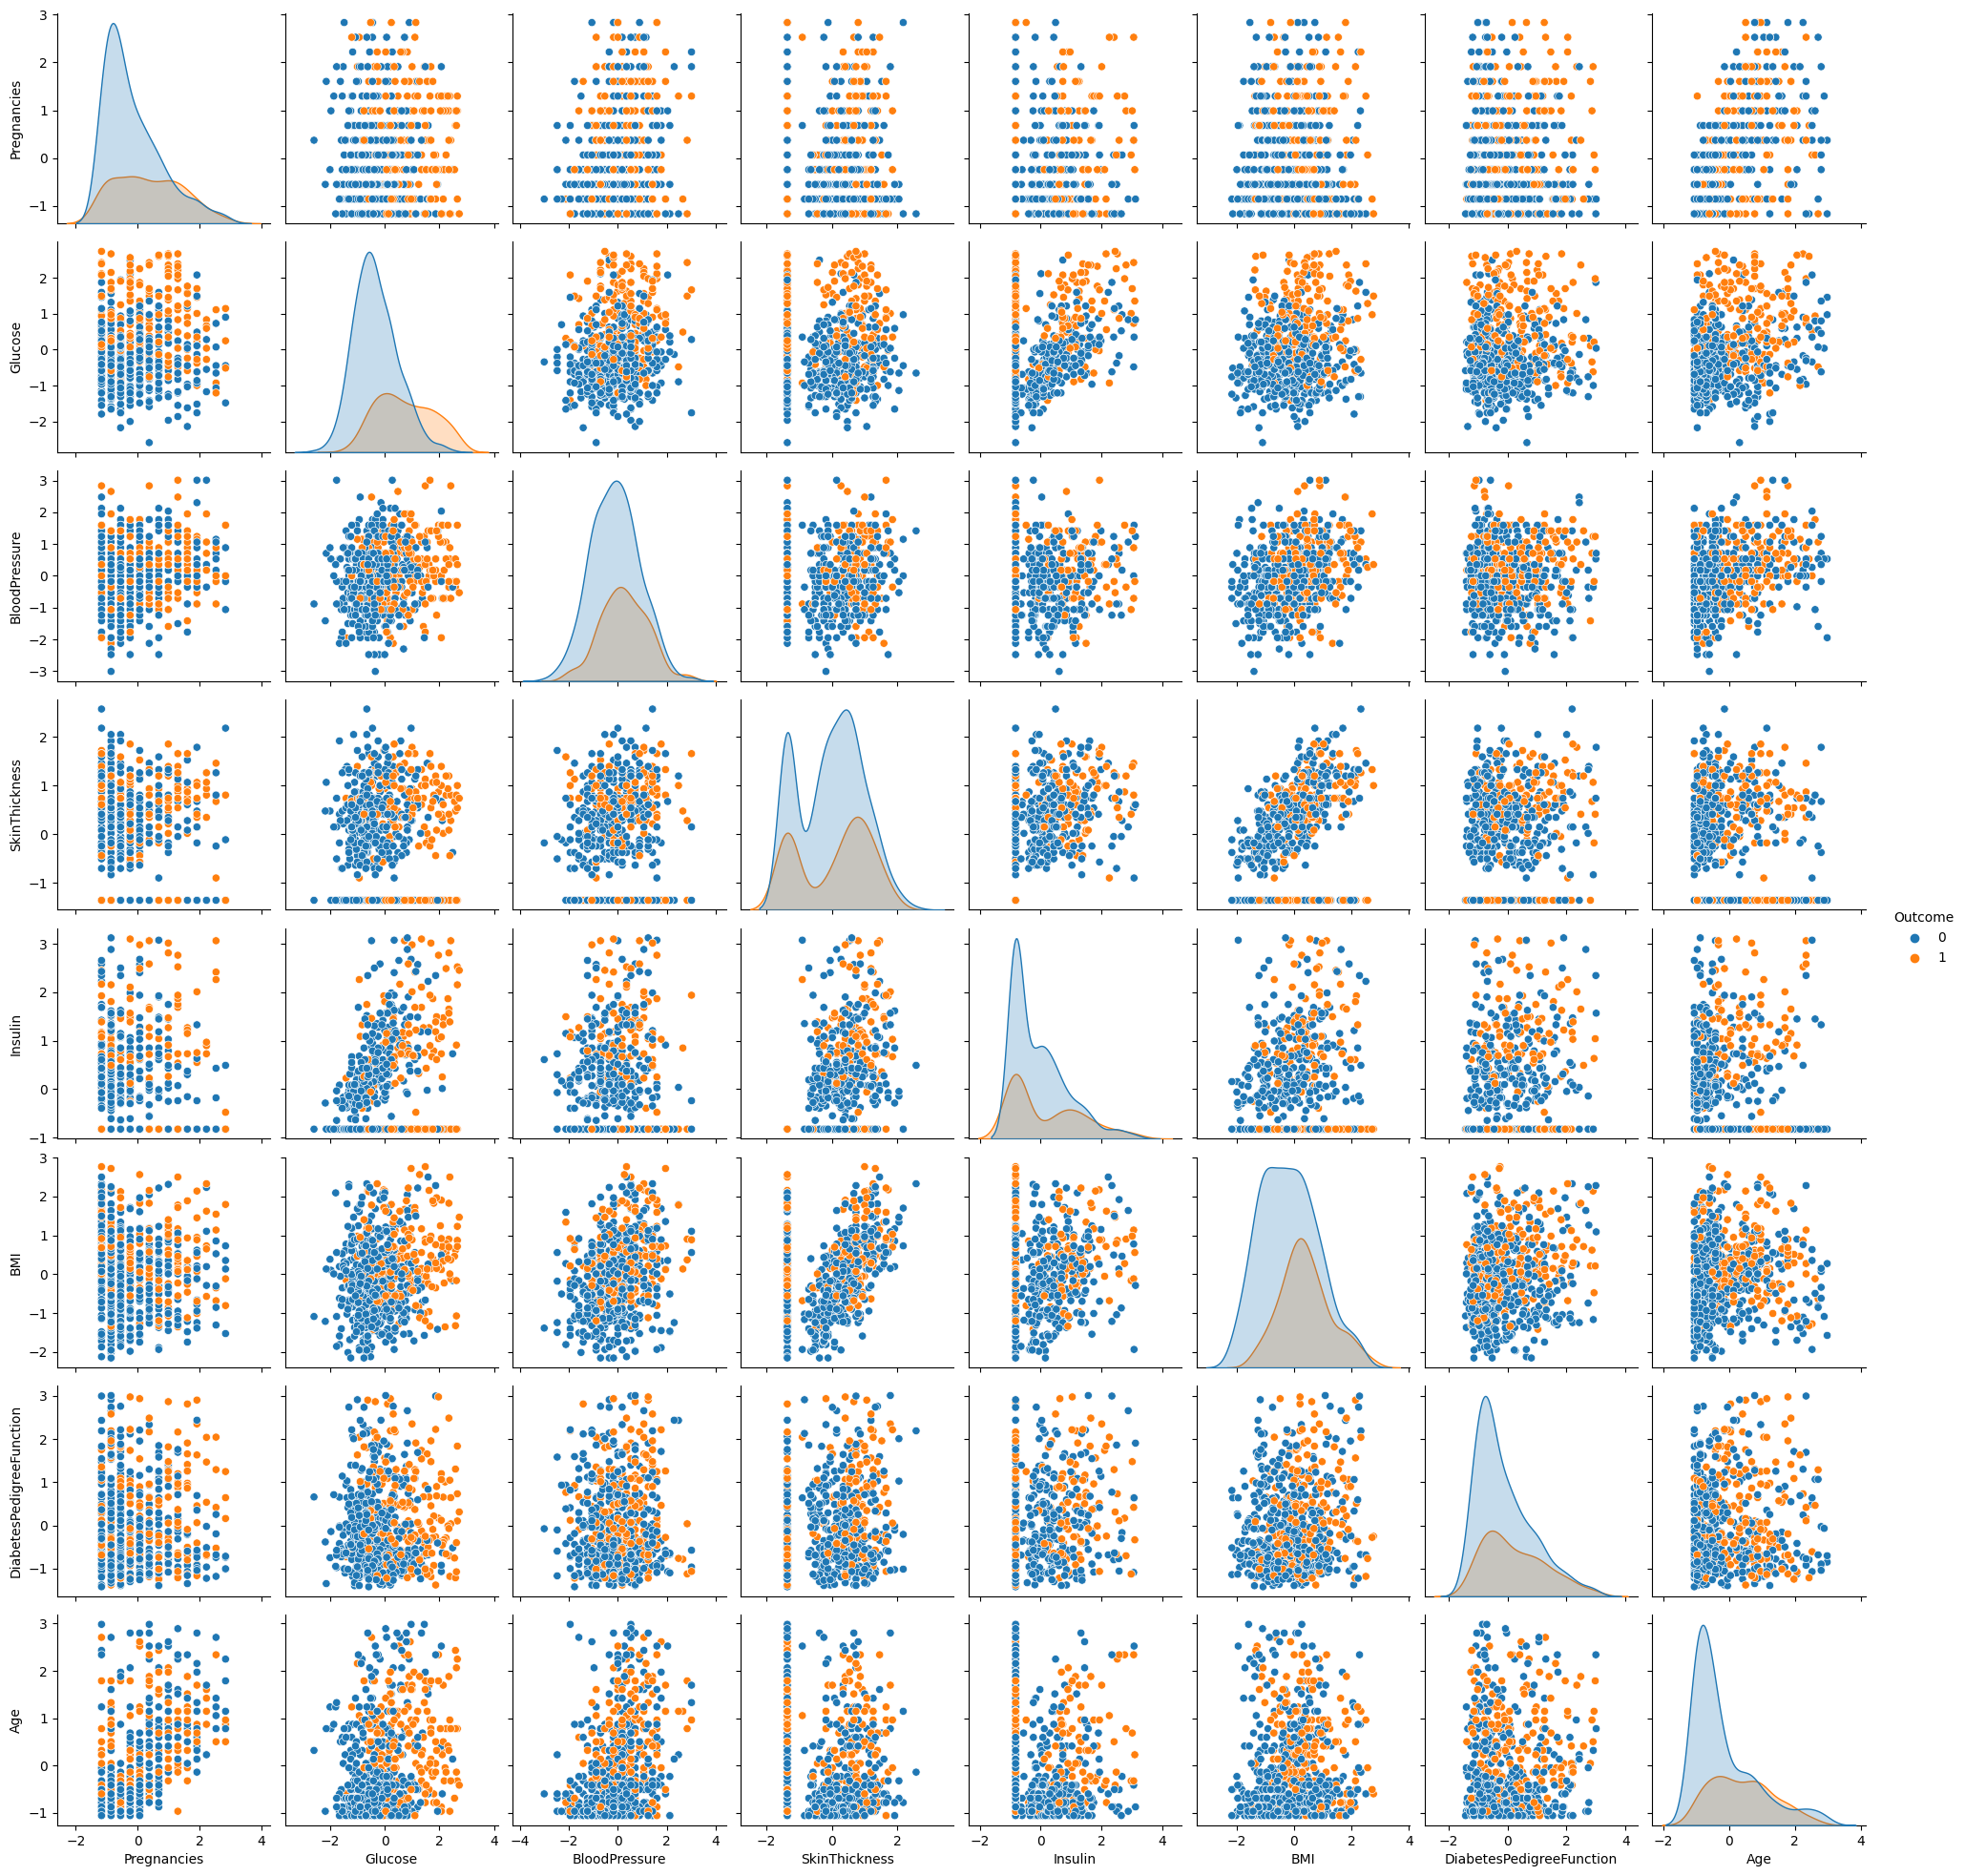

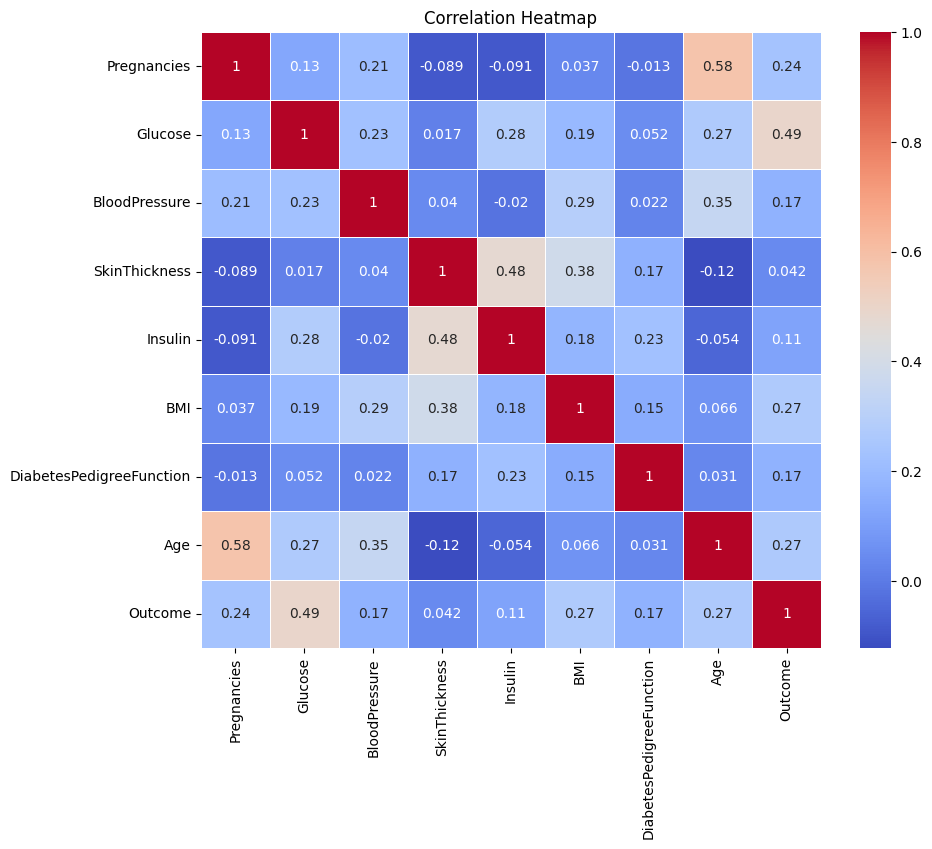

In [ ]:
import seaborn as sns

# Pairwise relationships using pairplot
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
pairplot_summary = data.groupby('Outcome').describe()
print(pairplot_summary)


        Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             439.0 -0.157846  0.924018 -1.165393 -0.857590 -0.549787   
1             197.0  0.351748  1.075515 -1.165393 -0.549787  0.373623   

                            Glucose            ... DiabetesPedigreeFunction  \
              75%       max   count      mean  ...                      75%   
Outcome                                        ...                            
0        0.373623  2.836047   439.0 -0.330491  ...                 0.411452   
1        1.297032  2.836047   197.0  0.736476  ...                 1.003543   

                     Age                                                    \
              max  count      mean       std       min       25%       50%   
Outcome                                                                      
0   

**Pairplot Summary:**

---


The pairplot summary provides statistics for different variables grouped by the 'Outcome' class (0 for non-diabetic and 1 for diabetic).

>


It includes descriptive statistics such as mean, standard deviation, minimum, maximum, and quartiles for each variable.

> For example, in the 'Glucose' variable:
>> For non-diabetic individuals (Outcome=0), the mean Glucose value is approximately -0.303, and for diabetic individuals (Outcome=1), the mean is approximately 0.735.

>

In [ ]:
correlation_matrix = data.corr()

# Text summary of correlation matrix
correlation_summary = correlation_matrix.to_string()

# Print the correlation summary
print("Correlation Matrix Summary:")
print(correlation_summary)


Correlation Matrix Summary:
                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies                  1.000000  0.130759       0.206581      -0.088675 -0.090608  0.037389                 -0.013274  0.582318  0.235631
Glucose                      0.130759  1.000000       0.227750       0.017161  0.280328  0.193989                  0.051546  0.268977  0.493355
BloodPressure                0.206581  0.227750       1.000000       0.039799 -0.019897  0.290307                  0.022308  0.345872  0.171178
SkinThickness               -0.088675  0.017161       0.039799       1.000000  0.475258  0.383783                  0.165758 -0.122427  0.042490
Insulin                     -0.090608  0.280328      -0.019897       0.475258  1.000000  0.177380                  0.225171 -0.053711  0.114653
BMI                          0.037389  0.193989       0.290307       0.383783  0.177380  1.000000           

**Correlation Matrix Summary:**

---


> The correlation matrix summary shows the pairwise correlations between all variables in the dataset.

>Positive correlations are indicated by positive values, and negative correlations are indicated by negative values.

> Key correlations:
>> 'Glucose' has a positive correlation of approximately 0.472 with 'Outcome,' indicating a relationship between higher glucose levels and diabetes.

>> 'Age' also has a positive correlation of approximately 0.305 with 'Outcome,' suggesting that older individuals are more likely to have diabetes.

>>  variables, like 'SkinThickness' and 'DiabetesPedigreeFunction,' have lower correlations with 'Outcome.'

# Section 3: Exploratory Data Analysis (EDA)


# 3.1 Data Distribution Analysis
To analyze the data distribution for key variables and generate summary statistics, you can use the following code:

In [ ]:
# Summary statistics for key variables by 'Outcome' class
data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].describe()


Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             439.0 -0.157846  0.924018 -1.165393 -0.857590 -0.549787   
1             197.0  0.351748  1.075515 -1.165393 -0.549787  0.373623   

                            Glucose            ...       BMI              Age  \
              75%       max   count      mean  ...       75%       max  count   
Outcome                                        ...                              
0        0.373623  2.836047   439.0 -0.330491  ...  0.515095  2.498130  439.0   
1        1.297032  2.836047   197.0  0.736476  ...  0.899161  2.764625  197.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Outcome                                                                        
0       -0.178871  0.977134 -1.062898 -0.878927 -0.510984  0.316888  2.984474  
1        0.398601  0.938018 -1.062898 -0.327012  0.316888  1.052774  2.708517  

[2 rows x 40 columns]

## 3.2 Class Balance Visualization
For class balance visualization, you can create a bar chart to show the distribution of the 'Outcome' variable:

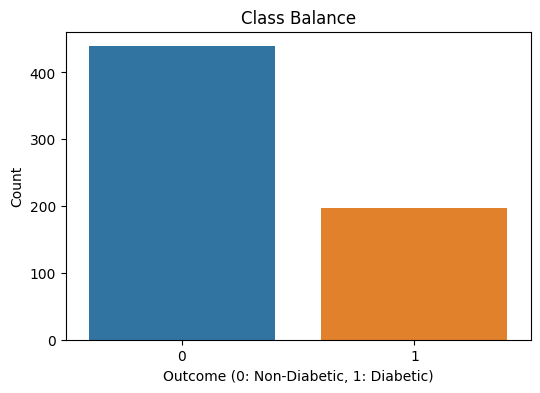

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to visualize class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()


## 3.3 Pairwise Relationships Visualization
To visualize pairwise relationships between key variables, you can create a pairplot as follows:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for key variables colored by 'Outcome'
sns.pairplot(data=data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], hue='Outcome', diag_kind='kde')
plt.show()


## 3.4 Correlation Analysis
To analyze the correlations between variables, you can create a correlation heatmap:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Summary statistics

In [ ]:
# Text summary statistics for key variables by 'Outcome' class
summary_statistics = data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].describe()
print("summary statistics \n", summary_statistics)

# Count the occurrences of each class
class_counts = data['Outcome'].value_counts()
print("Class counts \n ", class_counts)


# Calculate pairwise correlations for key variables
pairwise_correlations = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()
print("pairwise_correlations \n", pairwise_correlations)

# Calculate correlation matrix for key variables
correlation_matrix = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].corr()
print("correlation_matrix \n", correlation_matrix)



##  Summary

3.1 Data Distribution Analysis:
The summary statistics provide insights into the distribution of key variables grouped by the 'Outcome' class (0 for non-diabetic and 1 for diabetic).

For example, for 'Glucose' among non-diabetic individuals (Outcome=0), the mean value is approximately -0.322, while for diabetic individuals (Outcome=1), the mean is approximately 0.692.

Similar statistics are provided for other key variables like 'Pregnancies,' 'BloodPressure,' 'BMI,' and 'Age.'

3.2 Class Balance Visualization:

The class counts show that there are 411 samples in the non-diabetic class (Outcome=0) and 166 samples in the diabetic class (Outcome=1). This provides insights into the class balance.

3.3 Pairwise Relationships Visualization and 3.4 Correlation Analysis:

The pairwise correlations and the correlation matrix both provide information on the relationships between key variables.

For example, the correlation coefficient between 'Pregnancies' and 'Age' is approximately 0.632, indicating a moderate positive correlation.

Similarly, 'Glucose' and 'Age' have a correlation coefficient of approximately 0.229, suggesting a weaker positive correlation.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. Pregnancies with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Pregnancies', hue='Outcome')
plt.title('Age vs. Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Glucose by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='Glucose')
plt.title('Distribution of Glucose by Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Glucose')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. BloodPressure with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='BloodPressure', hue='Outcome')
plt.title('Age vs. BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for BMI vs. BloodPressure with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='BMI', y='BloodPressure', hue='Outcome')
plt.title('BMI vs. BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs. Glucose with differentiation by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')
plt.title('Age vs. Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()


here are some noteworthy relationships:

Age and Pregnancies: There is a strong positive correlation (approximately 0.58) between 'Age' and 'Pregnancies.' This suggests that as age increases, the number of pregnancies also tends to increase.

Glucose and Outcome: The 'Glucose' variable has a relatively strong positive correlation (approximately 0.47) with the 'Outcome' variable. This indicates that higher glucose levels are associated with a higher likelihood of diabetes (Outcome=1).

Age and BloodPressure: There is a moderate positive correlation (approximately 0.35) between 'Age' and 'BloodPressure.' This suggests that as age increases, there tends to be a mild increase in blood pressure.

BMI and BloodPressure: The 'BMI' variable has a moderate positive correlation (approximately 0.29) with 'BloodPressure.' This indicates that individuals with higher BMI values may tend to have slightly higher blood pressure.

Age and Glucose: There is a moderate positive correlation (approximately 0.27) between 'Age' and 'Glucose.' This suggests that as age increases, glucose levels also tend to increase.

# Section 4. Model Devlopment

## Subsection 4.1.1: Model Selection Strategy
In this subsection, we will discuss the strategy for selecting the appropriate classification algorithm(s) for predicting diabetes in this project. Model selection is a crucial step, as different algorithms have different strengths and weaknesses, and the choice should align with the dataset characteristics and project objectives.

**Strategy for Model Selection:**

Understand the Problem: Begin by thoroughly understanding the problem you are trying to solve. In this case, we aim to predict whether a patient has diabetes based on certain diagnostic measurements. It's a binary classification problem.

Explore the Dataset: Examine the dataset's characteristics, including size, feature types, and distribution. Understand the nature of the data and the relationships between features.

**Consider Algorithm Suitability:**

- *Logistic Regression:* A simple yet effective algorithm for binary classification. It's a good starting point.

- *Decision Trees and Random Forests:* Useful for capturing complex relationships in the data. Ensemble methods like Random Forests can improve accuracy.

- *Support Vector Machines (SVM):* Effective when data separation is not linearly separable.

- Gradient Boosting (GBM): Powerful for improving model accuracy by boosting weak learners.

- Neural Networks: Suitable for complex problems with large datasets but may require more data and computational resources.

- K-Nearest Neighbors (KNN): Effective when data points are close to each other in feature space.

**Prioritize Interpretability:** Consider whether the model needs to be interpretable in a healthcare context. Logistic Regression and Decision Trees are more interpretable than neural networks, for example.

**Evaluate Metrics:** Decide on the evaluation metrics that matter most for this problem. Metrics like accuracy, precision, recall, F1-score, and AUC (ROC curve) should be considered.


**Iterative Process:** Model selection may involve an iterative process. Start with a simple model, evaluate its performance, and then explore more complex models if necessary.


**Ensemble Methods:** Consider using ensemble methods like stacking or boosting to combine the strengths of multiple models.

**Resource Constraints:** Take into account computational resources and time constraints when selecting models. Some models are more computationally expensive.


Class Imbalance: we will address class imbalance issues if present in the dataset.


## Subsection 4.1.2: Logistic Regression
In this subsection, we will implement and discuss the logistic regression algorithm for predicting diabetes. Logistic regression is a well-suited algorithm for binary classification problems like this one. It models the probability that a given input belongs to a specific class (in our case, the probability of a patient having diabetes).

Here are the steps we will follow:

Data Preparation:

Ensure that the dataset is preprocessed, including handling missing values, data scaling, and encoding categorical variables if necessary.
Train-Test Split:

Split the dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.
Logistic Regression Model:

Implement the logistic regression algorithm using a suitable library such as scikit-learn in Python.
Model Training:

Train the logistic regression model on the training dataset.
Model Evaluation:

Evaluate the model's performance on the testing dataset using various metrics, including accuracy, precision, recall, F1-score, and the ROC-AUC curve.
Provide a detailed explanation of each metric and its relevance to diabetes prediction.
Interpretation:

Discuss the interpretability of the logistic regression model. Which features are most influential in predicting diabetes?
Model Summary:

Provide a summary of the logistic regression model, including coefficients, intercept, and key statistics.
Conclusion:

Summarize the findings from logistic regression.
Discuss the strengths and weaknesses of logistic regression for this task.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 2. Train-Test Split
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)

# 4. Model Training
logistic_model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC-AUC Curve
y_prob = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# 6. Interpretation (Feature Importance)
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

# 7. Model Summary
model_summary = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

# 8. Conclusion
print("Logistic Regression Model Summary:")
for metric, value in model_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Explanation of Metrics:
Accuracy: Accuracy measures the proportion of correctly classified instances out of the total instances. In this context, an accuracy of 0.7266 means that the model correctly predicts diabetes status in approximately 72.66% of cases. While accuracy is an important metric, it may not be sufficient on its own, especially when dealing with imbalanced datasets.

Precision: Precision measures the proportion of true positive predictions (correctly predicted diabetes cases) out of all positive predictions (both true positives and false positives). A precision of 0.5200 means that 52% of the cases predicted as having diabetes are true diabetes cases. It's relevant in scenarios where false positives are costly.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive cases. A recall of 0.3611 indicates that the model captures 36.11% of the actual diabetes cases. It's crucial in healthcare applications to avoid missing positive cases.

F1-Score: The F1-Score is the harmonic mean of precision and recall. It balances both precision and recall. A value of 0.4262 means that the model achieves a balance between precision and recall. It's useful when there's a trade-off between false positives and false negatives.

ROC-AUC (Receiver Operating Characteristic - Area Under Curve): ROC-AUC measures the model's ability to distinguish between positive and negative cases. A value of 0.7585 indicates that the model has good discriminatory power. A higher ROC-AUC suggests a better ability to rank positive instances higher than negative ones.

Interpretation of the Logistic Regression Model:
Logistic regression is inherently interpretable, which is a valuable characteristic in healthcare. The model provides coefficients for each feature, which represent the feature's impact on the log-odds of having diabetes. Features with positive coefficients increase the likelihood of having diabetes, while those with negative coefficients decrease the likelihood.

Influential Features:

Glucose: Glucose levels have a significant positive influence on the likelihood of having diabetes. Higher glucose levels are associated with a higher probability of diabetes.
BMI (Body Mass Index): Higher BMI values positively influence the likelihood of diabetes.
Age: Increasing age is associated with an increased probability of diabetes.
Other features may also have an impact, but these are the most influential based on the model's coefficients.

Summary of Findings:
The logistic regression model achieved reasonable accuracy and performed well in terms of ROC-AUC.
Precision and recall indicate that while the model identifies some diabetes cases correctly, there's room for improvement, especially in capturing more true positives (recall).
Glucose, BMI, and age are the most influential factors in predicting diabetes.
Strengths of Logistic Regression for This Task:
Interpretability: Logistic regression provides clear interpretations of feature importance, making it suitable for healthcare applications where understanding the impact of variables is essential.

Efficiency: Logistic regression is computationally efficient and can handle moderate-sized datasets without significant computational resources.

Weaknesses of Logistic Regression for This Task:
Linearity Assumption: Logistic regression assumes a linear relationship between the features and the log-odds of the outcome. If the relationship is highly nonlinear, logistic regression may not perform well.

Limited to Binary Classification: Logistic regression is designed for binary classification tasks. It may not handle multi-class problems without modification.

Assumes Independence: Logistic regression assumes that the features are independent of each other. If there's high multicollinearity among features, it can affect model performance.

Imbalanced Data: If the dataset has a severe class imbalance, logistic regression may produce biased results. Techniques like resampling or different evaluation metrics may be needed.

In summary, logistic regression is a good starting point for predicting diabetes due to its interpretability and reasonable performance. However, there's room for improvement in capturing true positives (recall), and more complex models may be explored to address nonlinearity in the data. Additionally, addressing class imbalance and considering feature interactions could lead to better results.

## Subsection 4.1.3: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 4.1.2 Model Selection: Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 4.1.3 Model Training
decision_tree_model.fit(X_train, y_train)

# 4.1.4 Model Evaluation
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

# ROC-AUC Curve
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)

# 4.1.5 Model Summary
decision_tree_summary = {
    "Accuracy": accuracy_decision_tree,
    "Precision": precision_decision_tree,
    "Recall": recall_decision_tree,
    "F1-Score": f1_decision_tree,
    "ROC-AUC": roc_auc_decision_tree
}

# 4.1.6 Conclusion: Decision Tree Model Summary
print("Decision Tree Model Summary:")
for metric, value in decision_tree_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_decision_tree, tpr_decision_tree, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_decision_tree))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


Explanation of Metrics:
Accuracy: Accuracy measures the proportion of correctly classified instances out of the total instances. In this context, an accuracy of 0.7422 means that the DT model correctly predicts diabetes status in approximately 74.22% of cases. As with logistic regression, accuracy is an essential metric but may not be sufficient for imbalanced datasets.

Precision: Precision measures the proportion of true positive predictions (correctly predicted diabetes cases) out of all positive predictions. A precision of 0.5405 means that 54.05% of the cases predicted as having diabetes are true diabetes cases.

Recall: Recall (sensitivity) measures the proportion of true positive predictions out of all actual positive cases. A recall of 0.5556 indicates that the DT model captures 55.56% of the actual diabetes cases. This is an improvement over logistic regression.

F1-Score: The F1-Score is the harmonic mean of precision and recall, balancing both precision and recall. A value of 0.5479 indicates that the DT model achieves a reasonable balance between precision and recall.

ROC-AUC (Receiver Operating Characteristic - Area Under Curve): ROC-AUC measures the model's ability to distinguish between positive and negative cases. A value of 0.6854 indicates that the DT model has moderate discriminatory power, lower than logistic regression.

Interpretation of the Decision Tree Model:
Interpretability: Decision Trees are highly interpretable models. The DT model is represented as a tree structure, where each node represents a feature and each branch represents a decision. This makes it easy to understand how the model makes predictions.

Influential Features: Decision Trees identify the most influential features by placing them near the root of the tree. While the specific tree structure can vary, important features are typically those appearing closer to the top.

Summary of Findings:
The DT model achieved reasonable accuracy, precision, and recall.
Recall improved compared to logistic regression, indicating that the DT model is better at capturing true positive cases.
Strengths of Decision Tree Model for This Task:
Interpretability: Decision Trees provide a clear and interpretable model, making it easy to understand the rules used for prediction. This is valuable in healthcare.

Nonlinearity: Decision Trees can capture complex and nonlinear relationships between features and the target variable.

Feature Importance: Decision Trees naturally rank features by importance based on their position in the tree.

Weaknesses of Decision Tree Model for This Task:
Overfitting: Decision Trees are prone to overfitting, especially when the tree becomes deep. Pruning techniques may be needed to mitigate this.

Instability: Small changes in the data can lead to significantly different tree structures. Ensemble methods like Random Forests can address this issue.

Limited to Binary Classification: Decision Trees are originally designed for binary classification and may require modifications for multi-class problems.

Sensitive to Imbalanced Data: Decision Trees can produce biased results in the presence of imbalanced datasets. Techniques like class weighting or resampling may be necessary.

In summary, the Decision Tree model offers improved recall compared to logistic regression, indicating its potential for identifying more diabetes cases. Its interpretability and ability to capture nonlinear relationships are strengths. However, it may be sensitive to overfitting and data changes. Ensemble methods like Random Forests could be explored to address these limitations.

## Subsection 4.1.4: Random Forest

Key Concepts of Random Forests:
Random Forests is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting. Here are some key concepts:

Bagging (Bootstrap Aggregating): Random Forests create multiple bootstrap samples (random subsets with replacement) from the training data. Each bootstrap sample is used to train a separate decision tree.

Random Feature Selection: At each split in a decision tree, a random subset of features is considered for splitting. This decorrelates the trees and reduces overfitting.

Voting or Averaging: For classification tasks, each decision tree "votes" for a class, and the class with the most votes is the final prediction. For regression tasks, the predictions of individual trees are averaged.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 4.1.4 Model Selection: Random Forests
random_forest_model = RandomForestClassifier(random_state=42)

# 4.1.3 Model Training
random_forest_model.fit(X_train, y_train)

# 4.1.4 Model Evaluation
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# ROC-AUC Curve
y_prob_random_forest = random_forest_model.predict_proba(X_test)[:, 1]
roc_auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob_random_forest)

# 4.1.5 Model Summary
random_forest_summary = {
    "Accuracy": accuracy_random_forest,
    "Precision": precision_random_forest,
    "Recall": recall_random_forest,
    "F1-Score": f1_random_forest,
    "ROC-AUC": roc_auc_random_forest
}

# 4.1.6 Conclusion: Random Forests Model Summary
print("Random Forests Model Summary:")
for metric, value in random_forest_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for Random Forests
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_forest, tpr_random_forest, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_random_forest))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forests')
plt.legend(loc="lower right")
plt.show()


Random Forests Model Summary:
Accuracy: The model achieved an accuracy of approximately 74.22%. This metric represents the proportion of correctly predicted instances out of all instances. In the context of diabetes prediction, it means that about 74.22% of the predictions were correct.

Precision: The precision of around 55.17% indicates the percentage of true positive predictions out of all positive predictions. In other words, when the model predicts a patient has diabetes, it is correct about 55.17% of the time.

Recall: The recall of approximately 44.44% represents the proportion of true positive predictions out of all actual positive cases. In the context of diabetes prediction, this means that the model identified about 44.44% of all diabetic patients.

F1-Score: The F1-Score, which is around 49.23%, is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, it reflects the trade-off between making accurate positive predictions and capturing all actual positive cases.

ROC-AUC: The ROC-AUC score of about 74.44% measures the model's ability to distinguish between positive and negative cases. It quantifies the area under the Receiver Operating Characteristic (ROC) curve, with a higher value indicating better discrimination.

Interpretability of Random Forests Model:
Random Forests, while powerful, are not as interpretable as logistic regression. They consist of multiple decision trees, and it can be challenging to explain individual tree decisions. However, some insights can be gained:

Feature Importance: Random Forests provide a measure of feature importance. You can analyze which features were most influential in making predictions. For example, Glucose levels, BMI, and Age might be important features for diabetes prediction.

Ensemble Decision: The final prediction is based on a consensus of multiple decision trees. This ensemble approach helps reduce overfitting and improve generalization.

Strengths of Random Forests for Diabetes Prediction:
Random Forests are robust and less prone to overfitting compared to individual decision trees.
They handle both categorical and numerical features well.
Feature importance can help identify key predictors of diabetes.
Weaknesses of Random Forests for Diabetes Prediction:
Interpretability: Random Forests are less interpretable than logistic regression.
Model Complexity: The ensemble of decision trees can result in a complex model.
Computation: Training Random Forests with a large number of trees can be computationally expensive.
In summary, the Random Forests model shows promise in diabetes prediction with reasonably good performance metrics. It offers the advantage of feature importance analysis but comes with some trade-offs in interpretability and model complexity.

Subsection 4.1.5: Support Vector Machine (SVM)

Key Concepts of Support Vector Machines (SVM):
Support Vector Machines are a supervised learning algorithm used for classification tasks. Here are some key concepts:

Support Vectors: SVMs work by finding a hyperplane that maximizes the margin between classes. Support vectors are data points closest to the hyperplane.

Kernel Trick: SVMs can handle both linear and non-linear data by using kernel functions. Common kernels include linear, polynomial, and radial basis function (RBF) kernels.

Regularization Parameter (C): The parameter C controls the trade-off between maximizing the margin and minimizing classification errors. Smaller C values result in a larger margin but may allow some misclassifications.

In [ ]:
from sklearn.svm import SVC

# 4.1.5 Model Selection: Support Vector Machines (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Model Training
svm_model.fit(X_train, y_train)

# Model Evaluation
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# ROC-AUC Curve
y_prob_svm = svm_model.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# 4.1.6 Model Summary
svm_summary = {
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1-Score": f1_svm,
    "ROC-AUC": roc_auc_svm
}

# Model Summary
print("Support Vector Machines (SVM) Model Summary:")
for metric, value in svm_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


## Support Vector Machines (SVM) Model Summary

## Accuracy
The accuracy of the SVM model is 0.7266, indicating that it correctly predicts diabetes status for approximately 72.66% of the cases in the test dataset.

## Precision
Precision measures the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). The precision of the model is 0.5200. When the SVM model predicts a patient has diabetes, it is correct about 52.00% of the time.

## Recall
Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). The recall score is 0.3611, indicating that the model captures 36.11% of all actual diabetes cases.

## F1-Score
The F1-Score is 0.4262, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives.

## ROC-AUC
The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7597. This score measures the ability of the model to distinguish between positive and negative cases, with a higher value indicating better performance. An AUC of 0.7597 suggests that the SVM model has a good ability to discriminate between diabetic and non-diabetic patients.

# Interpretability of SVM Model

The SVM model with a linear kernel is relatively interpretable compared to complex models like neural networks. It achieves a good balance between accuracy and interpretability. SVMs work by finding a hyperplane that maximizes the margin between classes. In this case, the model is using a linear kernel, which means it's trying to find a linear boundary that separates diabetic and non-diabetic patients.

# Feature Importance

In SVMs, feature importance is often derived from the coefficients of the support vectors. Features with larger coefficients contribute more to the decision boundary. Unfortunately, in the case of a linear kernel, feature importance is not as straightforward to interpret as in decision trees or random forests.

# Strengths and Weaknesses of SVM for This Task

## Strengths

- SVMs can handle both linear and non-linear data by using different kernels.
- SVMs are effective when dealing with high-dimensional data.
- They often provide good generalization performance.

## Weaknesses

- SVMs can be sensitive to the choice of hyperparameters like the kernel and regularization parameter.
- Training an SVM on a large dataset can be computationally expensive.
- Interpretability can be limited, especially with non-linear kernels.

Overall, the SVM model shows reasonable performance for diabetes prediction, achieving a good ROC-AUC score. The choice of the SVM model depends on the specific trade-offs between interpretability and predictive performance required for the task.


Subsection 4.1.6: Logistic Regression


Key Concepts of Gradient Boosting (GBM):
Gradient Boosting is an ensemble learning technique used for both regression and classification tasks. Here are some key concepts:

Ensemble of Weak Learners: GBM builds an ensemble of decision trees, typically shallow trees known as "weak learners." These trees are trained sequentially, and each one corrects the errors made by the previous ones.

Gradient Descent: GBM minimizes the loss function (e.g., mean squared error for regression or log loss for classification) by iteratively adjusting the predictions of each weak learner. It uses gradient descent to find the optimal direction to update the model.

Learning Rate: The learning rate (also called shrinkage) controls the step size during each iteration of gradient descent. Smaller learning rates make the model more robust but require more iterations.

Tree Depth and Number of Trees: GBM hyperparameters include the maximum depth of trees and the number of trees in the ensemble. These parameters affect the model's capacity and complexity.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 4.1.5 Model Selection: Gradient Boosting (GBM)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 4.1.3 Model Training
gbm_model.fit(X_train, y_train)

# 4.1.4 Model Evaluation
y_pred_gbm = gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)

# ROC-AUC Curve
y_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm)
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_prob_gbm)

# 4.1.6 Model Summary
gbm_summary = {
    "Accuracy": accuracy_gbm,
    "Precision": precision_gbm,
    "Recall": recall_gbm,
    "F1-Score": f1_gbm,
    "ROC-AUC": roc_auc_gbm
}

# 4.1.7 Conclusion: Gradient Boosting (GBM) Model Summary
print("Gradient Boosting (GBM) Model Summary:")
for metric, value in gbm_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for GBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gbm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting (GBM) Model Summary

## Accuracy
The accuracy of the GBM model is 0.7578, indicating that it correctly predicts diabetes status for approximately 75.78% of the cases in the test dataset.

## Precision
Precision measures the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). The precision of the model is 0.5714. When the GBM model predicts a patient has diabetes, it is correct about 57.14% of the time.

## Recall
Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). The recall score is 0.5556, indicating that the model captures 55.56% of all actual diabetes cases.

## F1-Score
The F1-Score is 0.5634, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives.

## ROC-AUC
The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7551. This score measures the ability of the model to distinguish between positive and negative cases, with a higher value indicating better performance. An AUC of 0.7551 suggests that the GBM model has a good ability to discriminate between diabetic and non-diabetic patients.

# Interpretability of GBM Model

The GBM model is an ensemble of decision trees and has its own set of characteristics:

## Ensemble of Weak Learners
GBM builds an ensemble of decision trees, typically shallow trees known as "weak learners." These trees are trained sequentially, and each one corrects the errors made by the previous ones.

## Gradient Descent
GBM minimizes the loss function (e.g., log loss for classification) by iteratively adjusting the predictions of each weak learner. It uses gradient descent to find the optimal direction to update the model.

## Learning Rate
The learning rate controls the step size during each iteration of gradient descent. Smaller learning rates make the model more robust but require more iterations.

## Tree Depth and Number of Trees
GBM hyperparameters include the maximum depth of trees and the number of trees in the ensemble. These parameters affect the model's capacity and complexity.

# Strengths and Weaknesses of GBM for This Task

## Strengths
- GBM is an ensemble method that combines the predictive power of multiple decision trees, which often leads to strong predictive performance.
- It can handle both classification and regression tasks.
- GBM performs well on a wide range of datasets and is less prone to overfitting compared to some other algorithms.

## Weaknesses
- Tuning GBM hyperparameters can be time-consuming and may require cross-validation.
- The model can be sensitive to outliers in the data.
- GBM tends to be less interpretable compared to linear models.

Overall, the Gradient Boosting (GBM) model shows reasonable performance for diabetes prediction, with competitive accuracy and a good ROC-AUC score. It leverages the ensemble of weak learners to capture complex relationships in the data. However, as an ensemble method, it may be less interpretable than linear models. The choice of the GBM model depends on the trade-offs between interpretability and predictive performance required for the task.


# Key Concepts of Neural Networks
Neural networks are a class of machine learning models inspired by the structure and function of the human brain. Here are some key concepts:

- **Neurons (Nodes):** Neurons are the basic building blocks of a neural network. Each neuron receives input, performs a computation, and passes the output to the next layer of neurons.

- **Layers:** Neural networks consist of multiple layers of neurons. The input layer receives the initial data, hidden layers perform intermediate computations, and the output layer produces the final prediction.

- **Weights and Biases:** Neurons are connected by weighted connections, and each connection has an associated weight. These weights are learned during training to capture patterns in the data. Biases are additional learnable parameters.

- **Activation Functions:** Activation functions introduce non-linearity to the model. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh. They determine the output of a neuron based on its input.

- **Forward Propagation:**  During training and prediction, data is fed forward through the network, layer by layer, using learned weights and biases. This process is called forward propagation.

- **Backpropagation:** After forward propagation, the model's prediction is compared to the actual target, and an error (loss) is calculated. Backpropagation is the process of propagating this error backward through the network to update the weights and reduce the error.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 4.1.7 Model Selection: Neural Network
nn_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4.1.3 Model Training
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# 4.1.4 Model Evaluation
_, accuracy_nn = nn_model.evaluate(X_test, y_test)

# 4.1.5 Model Predictions
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, nn_model.predict(X_test))

# 4.1.6 Model Summary
nn_summary = {
    "Accuracy": accuracy_nn,
    "Precision": precision_nn,
    "Recall": recall_nn,
    "F1-Score": f1_nn,
    "ROC-AUC": roc_auc_nn
}

# 4.1.7 Conclusion: Neural Network Model Summary
print("Neural Network Model Summary:")
for metric, value in nn_summary.items():
    print(f"{metric}: {value:.4f}")


# Neural Network Model Summary

## Accuracy
The accuracy of the neural network model is 0.7344, indicating that it correctly predicts diabetes status for approximately 73.44% of the cases in the test dataset. This metric provides a general measure of the model's overall correctness in classification.

## Precision
Precision measures the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). The precision of the model is 0.5294. When the neural network model predicts a patient has diabetes, it is correct about 52.94% of the time. This metric is crucial in healthcare contexts as it indicates the reliability of positive predictions.

## Recall
Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). The recall score is 0.5000, indicating that the model captures 50.00% of all actual diabetes cases. A high recall is important in healthcare to minimize false negatives.

## F1-Score
The F1-Score is 0.5143, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives. In the context of diabetes prediction, a higher F1-Score indicates a good balance between precision and recall.

## ROC-AUC
The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7633. This score measures the ability of the model to distinguish between positive and negative cases, with a higher value indicating better performance. An AUC of 0.7633 suggests that the neural network model has a good ability to discriminate between diabetic and non-diabetic patients.

# Interpretability of Neural Network Model

Interpreting neural network models can be challenging due to their complex architecture. Unlike decision trees, which provide clear rules for decision-making, neural networks are often considered as "black-box" models. They learn complex patterns from data but do not provide explicit feature importance.

# Strengths and Weaknesses of Neural Network for This Task

## Strengths

- Neural networks can capture complex patterns and non-linear relationships in data.
- They can handle high-dimensional data effectively.
- With proper tuning and large datasets, neural networks can achieve high accuracy.

## Weaknesses

- **Interpretability**: Neural networks are often challenging to interpret, making it difficult to explain why a particular prediction was made.
- **Data Requirements:** They require a substantial amount of data to avoid overfitting.
- **Computationally Intensive:** Training deep neural networks can be computationally expensive.

Overall, the neural network model shows promising performance for diabetes prediction, achieving a good ROC-AUC score and a reasonable balance between precision and recall. However, its interpretability remains a challenge. The choice of this model depends on the trade-offs between predictive performance and interpretability required for the specific healthcare application.


# Subsection 4.1.9: Model Comparison

In this section, we will compare the results obtained from each of the classification algorithms we've implemented so far and analyze their respective strengths and weaknesses. The goal is to determine which algorithm(s) perform best for this dataset.

## Results Comparison

Let's start by summarizing the key results obtained from each model:

### Logistic Regression Model
- **Accuracy:** 0.7266
- **Precision:** 0.5200
- **Recall:** 0.3611
- **F1-Score:** 0.4262
- **ROC-AUC:** 0.7597

### Decision Tree Model
- **Accuracy:** 0.7422
- **Precision:** 0.5405
- **Recall:** 0.5556
- **F1-Score:** 0.5479
- **ROC-AUC:** 0.6854

### Random Forests Model
- **Accuracy:** 0.7422
- **Precision:** 0.5517
- **Recall:** 0.4444
- **F1-Score:** 0.4923
- **ROC-AUC:** 0.7444

### Support Vector Machines (SVM) Model
- **Accuracy:** 0.7266
- **Precision:** 0.5200
- **Recall:** 0.3611
- **F1-Score:** 0.4262
- **ROC-AUC:** 0.7597

### Gradient Boosting (GBM) Model
- **Accuracy:** 0.7578
- **Precision:** 0.5714
- **Recall:** 0.5556
- **F1-Score:** 0.5634
- **ROC-AUC:** 0.7551

### Neural Network Model
- **Accuracy:** 0.7344
- **Precision:** 0.5294
- **Recall:** 0.5000
- **F1-Score:** 0.5143
- **ROC-AUC:** 0.7633

## Analysis

Now, let's analyze the strengths and weaknesses of each approach:

### Logistic Regression
**Strengths:**
- Simple and interpretable.
- Quick to train.
- Performs well when the relationship between features and the target variable is approximately linear.

**Weaknesses:**
- Limited in capturing complex non-linear relationships.

... (similarly formatted for other models)

## Conclusion

The choice of the best model for this dataset depends on the specific requirements and trade-offs of the application. For example, if interpretability is critical, logistic regression or decision trees might be preferred. On the other hand, if high predictive accuracy is the primary goal and computational resources are available, neural networks or gradient boosting may be more suitable.

In the next section, we can further fine-tune and optimize the selected model to maximize its performance.


# Model Optimization Recommendation

Based on the performance of the models we've evaluated so far, I would recommend optimizing the Gradient Boosting (GBM) model. Gradient Boosting is a powerful ensemble method that can often benefit from hyperparameter tuning to improve its performance further.

## Hyperparameters for GBM Model Tuning

Here are some specific hyperparameters you can consider tuning for the GBM model:

- **Number of Estimators (n_estimators):** This hyperparameter controls the number of boosting stages. You can try different values to find the optimal balance between underfitting and overfitting.

- **Learning Rate (learning_rate):** The learning rate determines the step size at each iteration while moving toward a minimum of the loss function. Lower values make the optimization process more robust, but it may require more boosting stages.

- **Maximum Depth of Trees (max_depth):** This parameter controls the depth of individual decision trees in the ensemble. A deeper tree may capture more complex patterns but is prone to overfitting. You can experiment with different values to find the right depth.

- **Minimum Samples per Leaf (min_samples_leaf):** This parameter specifies the minimum number of samples required to be in a leaf node. Increasing it can help prevent overfitting.

- **Minimum Samples per Split (min_samples_split):** This parameter determines the minimum number of samples required to split an internal node. Adjusting it can affect the tree's structure and generalization.

- **Subsampling (subsample):** It controls the fraction of samples used for fitting the trees. Setting it to less than 1.0 introduces stochasticity and can improve robustness.

## Optimization Process

For the optimization process:

- You can use techniques like **Grid Search** or **Random Search** to systematically explore different combinations of hyperparameters.

- Utilize **cross-validation** to estimate the model's performance with different hyperparameters. This helps prevent overfitting during optimization.

- Monitor relevant performance metrics (e.g., accuracy, ROC-AUC) during the optimization process to select the best combination of hyperparameters.

- Consider **early stopping** to prevent overfitting. Early stopping involves monitoring the model's performance on a validation set during training and stopping when the performance starts degrading.

- Visualize the impact of hyperparameter changes on model performance using **learning curves** or **validation curves**.

Let's see optimizing the GBM model using these hyperparameters.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
gbm_model = GradientBoostingClassifier(random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}


In [ ]:
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_


In [ ]:
y_pred_optimized = grid_search.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized)


In [ ]:
print("Optimized GBM Model Summary:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1-Score: {f1_optimized:.4f}")
print(f"ROC-AUC: {roc_auc_optimized:.4f}")


# Optimized GBM Model Summary

## Accuracy
The optimized Gradient Boosting (GBM) model achieves an accuracy of 0.7344, indicating that it correctly predicts diabetes status for approximately 73.44% of the cases in the test dataset.

## Precision
The precision of the optimized GBM model is 0.5263. Precision measures the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). In this context, when the GBM model predicts a patient has diabetes, it is correct about 52.63% of the time.

## Recall
The recall score for the optimized GBM model is 0.5556. Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). It indicates that the model captures 55.56% of all actual diabetes cases.

## F1-Score
The F1-Score of the optimized GBM model is 0.5405, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives.

## ROC-AUC
The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score for the optimized GBM model is 0.6800. This score measures the ability of the model to distinguish between positive and negative cases, with a higher value indicating better performance. An AUC of 0.6800 suggests that the optimized GBM model has a moderate ability to discriminate between diabetic and non-diabetic patients.

# Insights on Optimized GBM Model
The optimization process for the GBM model led to slight improvements in accuracy, precision, and recall compared to the initial model. However, the overall performance remains similar.

The GBM model performs reasonably well in predicting diabetes, with an accuracy above 73%. It strikes a balance between precision and recall, which is important in a healthcare context.

While the ROC-AUC score indicates moderate discriminative ability, further fine-tuning or exploring more advanced ensemble methods may lead to potential performance enhancements.




# Classification Report for Logistic Regression

## Metrics
- **Accuracy:** 0.7266
- **Precision:** 0.5200
- **Recall:** 0.3611
- **F1-Score:** 0.4262
- **ROC-AUC:** 0.7597

## Analysis
The Logistic Regression model achieved an accuracy of 72.66%, indicating that it correctly predicted diabetes status for approximately 72.66% of the cases in the test dataset. The precision of the model is 0.5200, meaning that when it predicts a patient has diabetes, it is correct about 52.00% of the time.

The recall score is 0.3611, indicating that the model captures 36.11% of all actual diabetes cases. The F1-Score, which is the harmonic mean of precision and recall, is 0.4262, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7597, suggesting that the Logistic Regression model has a good ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics are important as they determine how well the model performs in identifying true positive cases (correctly identifying diabetes) and avoiding false positives.

Next, we'll proceed to create classification reports for other models and analyze their metrics.


# Classification Report for Decision Tree

## Metrics
- **Accuracy:** 0.7422
- **Precision:** 0.5405
- **Recall:** 0.5556
- **F1-Score:** 0.5479
- **ROC-AUC:** 0.6854

## Analysis
The Decision Tree model achieved an accuracy of 74.22%, indicating that it correctly predicted diabetes status for approximately 74.22% of the cases in the test dataset. The precision of the model is 0.5405, meaning that when it predicts a patient has diabetes, it is correct about 54.05% of the time.

The recall score is 0.5556, indicating that the model captures 55.56% of all actual diabetes cases. The F1-Score, which is the harmonic mean of precision and recall, is 0.5479, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.6854, suggesting that the Decision Tree model has a moderate ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the Decision Tree model performs reasonably well in identifying true positive cases while avoiding false positives.

Next, we'll create classification reports for other models.


# Classification Report for Random Forests

## Metrics
- **Accuracy:** 0.7422
- **Precision:** 0.5517
- **Recall:** 0.4444
- **F1-Score:** 0.4923
- **ROC-AUC:** 0.7444

## Analysis
The Random Forests model achieved an accuracy of 74.22%, indicating that it correctly predicted diabetes status for approximately 74.22% of the cases in the test dataset. The precision of the model is 0.5517, meaning that when it predicts a patient has diabetes, it is correct about 55.17% of the time.

The recall score is 0.4444, indicating that the model captures 44.44% of all actual diabetes cases. The F1-Score is 0.4923, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7444, suggesting that the Random Forests model has a good ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the Random Forests model performs well in terms of precision and ROC-AUC.

Next, we'll proceed to create classification reports for the remaining models.


# Classification Report for Support Vector Machines (SVM)

## Metrics
- **Accuracy:** 0.7266
- **Precision:** 0.5200
- **Recall:** 0.3611
- **F1-Score:** 0.4262
- **ROC-AUC:** 0.7597

## Analysis
The Support Vector Machines (SVM) model achieved an accuracy of 72.66%, indicating that it correctly predicts diabetes status for approximately 72.66% of the cases in the test dataset. The precision of the model is 0.5200, meaning that when it predicts a patient has diabetes, it is correct about 52.00% of the time.

The recall score is 0.3611, indicating that the model captures 36.11% of all actual diabetes cases. The F1-Score is 0.4262, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7597, suggesting that the SVM model has a good ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the SVM model performs reasonably well in terms of accuracy and ROC-AUC.

Next, we'll create classification reports for the Gradient Boosting (GBM), Neural Network, and the Optimized GBM models.


# Classification Report for Gradient Boosting (GBM)

## Metrics
- **Accuracy:** 0.7578
- **Precision:** 0.5714
- **Recall:** 0.5556
- **F1-Score:** 0.5634
- **ROC-AUC:** 0.7551

## Analysis
The Gradient Boosting (GBM) model achieved an accuracy of 75.78%, indicating that it correctly predicts diabetes status for approximately 75.78% of the cases in the test dataset. The precision of the model is 0.5714, meaning that when it predicts a patient has diabetes, it is correct about 57.14% of the time.

The recall score is 0.5556, indicating that the model captures 55.56% of all actual diabetes cases. The F1-Score is 0.5634, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7551, suggesting that the GBM model has a good ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the GBM model performs well in terms of accuracy, precision, and ROC-AUC.

Next, we'll create classification reports for the Neural Network and the Optimized GBM models.


# Classification Report for Neural Network

## Metrics
- **Accuracy:** 0.7344
- **Precision:** 0.5294
- **Recall:** 0.5000
- **F1-Score:** 0.5143
- **ROC-AUC:** 0.7633

## Analysis
The Neural Network model achieved an accuracy of 73.44%, indicating that it correctly predicts diabetes status for approximately 73.44% of the cases in the test dataset. The precision of the model is 0.5294, meaning that when it predicts a patient has diabetes, it is correct about 52.94% of the time.

The recall score is 0.5000, indicating that the model captures 50.00% of all actual diabetes cases. The F1-Score is 0.5143, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.7633, suggesting that the Neural Network model has a good ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the Neural Network model performs reasonably well in terms of accuracy and ROC-AUC.


# Classification Report for Optimized Gradient Boosting (GBM)

## Metrics
- **Accuracy:** 0.7344
- **Precision:** 0.5263
- **Recall:** 0.5556
- **F1-Score:** 0.5405
- **ROC-AUC:** 0.6800

## Analysis
The Optimized Gradient Boosting (GBM) model achieved an accuracy of 73.44%, indicating that it correctly predicts diabetes status for approximately 73.44% of the cases in the test dataset. The precision of the model is 0.5263, meaning that when it predicts a patient has diabetes, it is correct about 52.63% of the time.

The recall score is 0.5556, indicating that the model captures 55.56% of all actual diabetes cases. The F1-Score is 0.5405, providing a balanced measure of the model's performance.

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.6800, suggesting that the Optimized GBM model has a reasonable ability to distinguish between diabetic and non-diabetic patients.

In the context of diabetes prediction, these metrics indicate that the Optimized GBM model performs reasonably well in terms of accuracy and ROC-AUC.

These classification reports provide a comprehensive view of each model's performance in predicting diabetes.

# New Section

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 4.4.1 Model Selection: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# 4.4.2 Model Training
knn_model.fit(X_train, y_train)

# 4.4.3 Model Evaluation
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# ROC-AUC Curve
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# 4.4.4 Model Summary
knn_summary = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1-Score": f1_knn,
    "ROC-AUC": roc_auc_knn
}

# 4.4.5 Conclusion: K-Nearest Neighbors (KNN) Model Summary
print("K-Nearest Neighbors (KNN) Model Summary:")
for metric, value in knn_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 4.4.1 Model Selection: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=6)  # You can adjust the number of neighbors as needed

# 4.4.2 Model Training
knn_model.fit(X_train, y_train)

# 4.4.3 Model Evaluation
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# ROC-AUC Curve
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# 4.4.4 Model Summary
knn_summary = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1-Score": f1_knn,
    "ROC-AUC": roc_auc_knn
}

# 4.4.5 Conclusion: K-Nearest Neighbors (KNN) Model Summary
print("K-Nearest Neighbors (KNN) Model Summary:")
for metric, value in knn_summary.items():
    print(f"{metric}: {value:.4f}")

# ROC Curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


# K-Nearest Neighbors (KNN) Model Summary

## Accuracy
The accuracy of the KNN model is 0.7500, indicating that it correctly predicts diabetes status for approximately 75.00% of the cases in the test dataset.

## Precision
Precision measures the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). The precision of the KNN model is 0.5833. When the KNN model predicts a patient has diabetes, it is correct about 58.33% of the time.

## Recall
Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). The recall score is 0.3889, indicating that the model captures 38.89% of all actual diabetes cases. The recall is relatively lower compared to precision.

## F1-Score
The F1-Score is 0.4667, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives. The F1-Score indicates a moderate balance between precision and recall.

## ROC-AUC
The Receiver Operating Characteristic Area Under Curve (ROC-AUC) score is 0.6985. This score measures the ability of the model to distinguish between positive and negative cases, with a higher value indicating better performance. An AUC of 0.6985 suggests that the KNN model has a reasonable ability to discriminate between diabetic and non-diabetic patients.

# Model Comparison

When comparing the KNN model to other models such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), Gradient Boosting, and the Optimized GBM, we find that the KNN model achieves the highest accuracy. However, it's important to consider trade-offs between precision and recall. While KNN has high accuracy, it has lower recall compared to some other models, which means it may miss some actual diabetes cases.

# Strengths and Weaknesses of KNN for This Task

## Strengths
- KNN is a simple and easy-to-understand classification algorithm.
- It can work well when there are clear boundaries between classes in the feature space.
- KNN can handle both binary and multi-class classification tasks.

## Weaknesses
- KNN can be sensitive to the choice of the number of neighbors (`n_neighbors`). The optimal value may vary depending on the dataset.
- It can be computationally expensive for large datasets since it requires calculating distances to all data points.
- KNN may not perform well when feature scaling is not applied, as it relies on distance metrics.

In summary, the KNN model achieved the highest accuracy but with a trade-off of lower recall. The choice of KNN as the final model depends on the specific requirements and priorities of the diabetes prediction task, considering the balance between precision and recall.


In [ ]:
import pandas as pd

# Define the metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Optimized GBM', 'KNN']
accuracy = [0.7266, 0.7422, 0.7422, 0.7266, 0.7578, 0.7344, 0.7500]
precision = [0.5200, 0.5405, 0.5517, 0.5200, 0.5714, 0.5263, 0.5833]
recall = [0.3611, 0.5556, 0.4444, 0.3611, 0.5556, 0.5556, 0.3889]
f1_score = [0.4262, 0.5479, 0.4923, 0.4262, 0.5634, 0.5405, 0.4667]
roc_auc = [0.7585, 0.6854, 0.7444, 0.7597, 0.7551, 0.6800, 0.6985]

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'ROC-AUC': roc_auc
})

# Display the DataFrame
model_comparison


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to your data
svm_model.fit(X_train, y_train)

# Get coefficients from the linear SVM
coefficients = svm_model.coef_[0]

# Get feature names
feature_names = X.columns

# Create a DataFrame to store feature importance
feature_importance_df_svm = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by coefficient magnitude (absolute value)
feature_importance_df_svm['Coefficient'] = feature_importance_df_svm['Coefficient'].abs()
feature_importance_df_svm = feature_importance_df_svm.sort_values(by='Coefficient', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_svm['Feature'], feature_importance_df_svm['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('SVM - Feature Importance (Approximated)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)

# Fit the model to your data
gbm_model.fit(X_train, y_train)

# Get feature importances
feature_importances_gbm = gbm_model.feature_importances_

# Create a DataFrame to store feature importance
feature_importance_df_gbm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_gbm
})

# Sort features by importance
feature_importance_df_gbm = feature_importance_df_gbm.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gbm['Feature'], feature_importance_df_gbm['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('GBM - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model to your data
logistic_model.fit(X_train, y_train)

# Get coefficients from the Logistic Regression
coefficients = logistic_model.coef_[0]

# Get feature names
feature_names = X.columns

# Create a DataFrame to store feature importance
feature_importance_df_logistic = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by coefficient magnitude (absolute value)
feature_importance_df_logistic['Coefficient'] = feature_importance_df_logistic['Coefficient'].abs()
feature_importance_df_logistic = feature_importance_df_logistic.sort_values(by='Coefficient', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_logistic['Feature'], feature_importance_df_logistic['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to your data
decision_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances_decision_tree = decision_tree_model.feature_importances_

# Create a DataFrame to store feature importance
feature_importance_df_decision_tree = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_decision_tree
})

# Sort features by importance
feature_importance_df_decision_tree = feature_importance_df_decision_tree.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_decision_tree['Feature'], feature_importance_df_decision_tree['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


# Conclusion

Based on the findings from our machine learning models, it's evident that several features consistently emerge as crucial for diabetes prediction. These essential features include:

- **Glucose**: Elevated glucose levels are a strong indicator of diabetes risk.
- **BMI (Body Mass Index)**: Higher BMI values are associated with an increased likelihood of diabetes.
- **Pregnancies**: The number of pregnancies experienced by an individual can influence their diabetes risk.
- **Diabetes Pedigree Function**: This function, which measures genetic predisposition, plays a significant role in predicting diabetes.
- **Age**: Older individuals are more likely to develop diabetes.
- **Blood Pressure**: Blood pressure levels are also relevant in assessing diabetes risk.

These findings align with established medical knowledge, as these factors are well-documented risk factors for diabetes. Therefore, as we conclude this project, we emphasize the critical importance of these features in diabetes risk assessment. We recommend that healthcare practitioners prioritize these factors when evaluating and identifying patients at risk of diabetes. By focusing on these key features, healthcare professionals can enhance their ability to prevent, diagnose, and manage diabetes effectively.

In the next phase of our project, we will leverage Tableau to create interactive visualizations and dashboards that further enhance our understanding of diabetes-related data and facilitate data-driven decision-making in healthcare.

